In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip gdrive/MyDrive/Projects/audio_signal/sentiment_classification/RAVDESS_data/Audio_Speech_Actors_01-24.zip

Archive:  gdrive/MyDrive/Projects/audio_signal/sentiment_classification/RAVDESS_data/Audio_Speech_Actors_01-24.zip
   creating: Audio_Speech_Actors_01-24/
   creating: Audio_Speech_Actors_01-24/Audio_Speech_Actors_01-24/
   creating: Audio_Speech_Actors_01-24/Audio_Speech_Actors_01-24/Actor_01/
  inflating: Audio_Speech_Actors_01-24/Audio_Speech_Actors_01-24/Actor_01/03-01-01-01-01-01-01.wav  
  inflating: Audio_Speech_Actors_01-24/Audio_Speech_Actors_01-24/Actor_01/03-01-01-01-01-02-01.wav  
  inflating: Audio_Speech_Actors_01-24/Audio_Speech_Actors_01-24/Actor_01/03-01-01-01-02-01-01.wav  
  inflating: Audio_Speech_Actors_01-24/Audio_Speech_Actors_01-24/Actor_01/03-01-01-01-02-02-01.wav  
  inflating: Audio_Speech_Actors_01-24/Audio_Speech_Actors_01-24/Actor_01/03-01-02-01-01-01-01.wav  
  inflating: Audio_Speech_Actors_01-24/Audio_Speech_Actors_01-24/Actor_01/03-01-02-01-01-02-01.wav  
  inflating: Audio_Speech_Actors_01-24/Audio_Speech_Actors_01-24/Actor_01/03-01-02-01-02-01-01.wav

In [ ]:
!unzip gdrive/MyDrive/Projects/audio_signal/sentiment_classification/TESS_data/dataverse_files.zip
!unzip gdrive/MyDrive/Projects/audio_signal/sentiment_classification/CREMA_data/AudioData.zip


Archive:  gdrive/MyDrive/Projects/audio_signal/sentiment_classification/TESS_data/dataverse_files.zip
  inflating: OAF_back_angry.wav      
  inflating: OAF_back_disgust.wav    
  inflating: OAF_back_fear.wav       
  inflating: OAF_back_happy.wav      
  inflating: OAF_back_neutral.wav    
  inflating: OAF_back_ps.wav         
  inflating: OAF_back_sad.wav        
  inflating: OAF_bar_angry.wav       
  inflating: OAF_bar_disgust.wav     
  inflating: OAF_bar_fear.wav        
  inflating: OAF_bar_happy.wav       
  inflating: OAF_bar_neutral.wav     
  inflating: OAF_bar_ps.wav          
  inflating: OAF_bar_sad.wav         
  inflating: OAF_base_angry.wav      
  inflating: OAF_base_disgust.wav    
  inflating: OAF_base_fear.wav       
  inflating: OAF_base_happy.wav      
  inflating: OAF_base_neutral.wav    
  inflating: OAF_base_ps.wav         
  inflating: OAF_base_sad.wav        
  inflating: OAF_bath_angry.wav      
  inflating: OAF_bath_disgust.wav    
  inflating: OAF_bath_fe

### Audio data (SAVEE)

In [ ]:

import os
import pandas as pd

In [ ]:
speakers = os.listdir('./AudioData')
speakers.sort()
speakers.pop(1)

'Info.txt'

In [ ]:
data_path = './AudioData'

In [ ]:
key_dict = {'a':'anger', 'd':'disgust', 'f':'fear','h':'happiness','n':'neutral','sa':'sadness','su':'surprise'}

In [ ]:
savee_dataframe = pd.DataFrame(columns=['song_path','sentiment'])

for speaker in speakers:
  audio_list = os.listdir(data_path+'/'+speaker)
  for audio in audio_list:
    if audio[0] in key_dict:
      sentiment = key_dict[audio[0]]
      path = data_path+'/'+speaker+'/'+audio

      df = {'song_path':path, 'sentiment': sentiment}
      savee_dataframe= savee_dataframe.append(df, ignore_index=True)
      # print(savee_dataframe.head())
      # savee_dataframe.loc(len(savee_dataframe.index)) = [data_path+'/'+speaker+'/'+audio, sentiment]
    else:
      sentiment = key_dict[audio[:2]]
      df = {'song_path':data_path+'/'+speaker+'/'+audio, 'sentiment': sentiment}
      
      savee_dataframe = savee_dataframe.append(df, ignore_index=True)
      # savee_dataframe.loc(len(savee_dataframe.index)) = [data_path+'/'+speaker+'/'+audio, key_dict[audio[:2]]]




In [ ]:
savee_dataframe.head()

,song_path,sentiment
0,./AudioData/DC/n20.wav,neutral
1,./AudioData/DC/su11.wav,surprise
2,./AudioData/DC/h05.wav,happiness
3,./AudioData/DC/a08.wav,anger
4,./AudioData/DC/d08.wav,disgust


## TESS data

In [ ]:
f = open('MANIFEST.TXT')

In [ ]:
lines = f.readlines()

In [ ]:
key_dict = {'angry':'anger', 'disgust':'disgust', 'fear':'fear','happy':'happiness','neutral':'neutral','sad':'sadness','ps':'surprise'}

In [ ]:
TESS_dataframe = pd.DataFrame(columns=['song_path','sentiment'])

for line in lines:
  path = './'+line.split(' ')[0]
  sentiment = key_dict[line.split(' ')[0].split('_')[-1].split('.')[0]]

  df = {'song_path':path, 'sentiment': sentiment}
  TESS_dataframe= TESS_dataframe.append(df, ignore_index=True)



In [ ]:
TESS_dataframe.head()

,song_path,sentiment
0,./OAF_back_angry.wav,anger
1,./OAF_back_disgust.wav,disgust
2,./OAF_back_fear.wav,fear
3,./OAF_back_happy.wav,happiness
4,./OAF_back_neutral.wav,neutral


## RAVDESS data

In [ ]:
data_path = './Audio_Speech_Actors_01-24/Audio_Speech_Actors_01-24'

In [ ]:
actors = os.listdir(data_path)

In [ ]:
key_dict = {'05':'anger', '07':'disgust', '06':'fear','03':'happiness','01':'neutral','04':'sadness','08':'surprise','02':'calm'}

In [ ]:
RAVDESS_dataframe = pd.DataFrame(columns=['song_path','sentiment'])
for actor in actors:
  speechs = os.listdir(data_path+'/'+actor)
  for speech in speechs:
    path = data_path+'/'+actor+'/'+speech
    sentiment = key_dict[speech.split('-')[2]]
    
    df = {'song_path':path, 'sentiment': sentiment}
    RAVDESS_dataframe= RAVDESS_dataframe.append(df, ignore_index=True)





In [ ]:
RAVDESS_dataframe.head()

,song_path,sentiment
0,./Audio_Speech_Actors_01-24/Audio_Speech_Actor...,fear
1,./Audio_Speech_Actors_01-24/Audio_Speech_Actor...,happiness
2,./Audio_Speech_Actors_01-24/Audio_Speech_Actor...,anger
3,./Audio_Speech_Actors_01-24/Audio_Speech_Actor...,calm
4,./Audio_Speech_Actors_01-24/Audio_Speech_Actor...,sadness


In [ ]:
data_path = pd.concat([savee_dataframe,TESS_dataframe,RAVDESS_dataframe], ignore_index=True)

### Feature Generation

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import librosa
from IPython.display import Audio

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


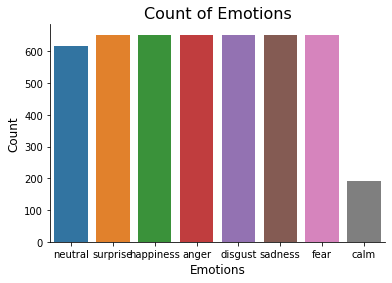

In [ ]:
plt.title('Count of Emotions', size=16)
sns.countplot(data_path.sentiment)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [ ]:
path = np.array(data_path.song_path[data_path.sentiment == 'fear'])[200]

In [ ]:
data, sampling_rate = librosa.load(path)

In [ ]:
Audio(path)

STFT

In [ ]:
import librosa.display

In [ ]:
X = librosa.stft(data)

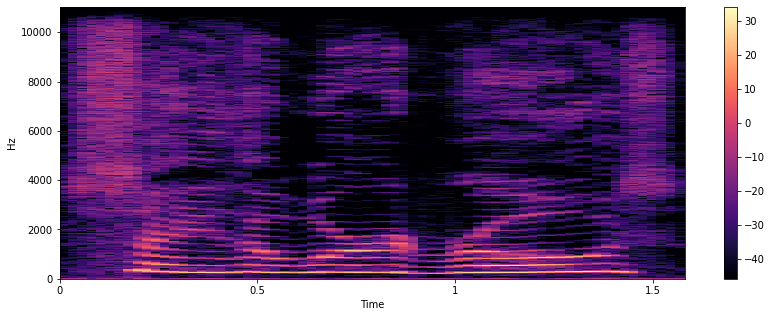

In [ ]:
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sampling_rate, x_axis='time', y_axis='hz')
plt.colorbar()

Zero crossing

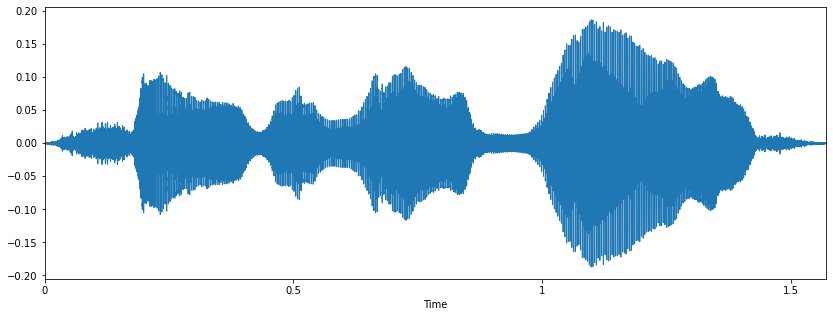

In [ ]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(data, sr=sampling_rate)

MFCC

(20, 68)


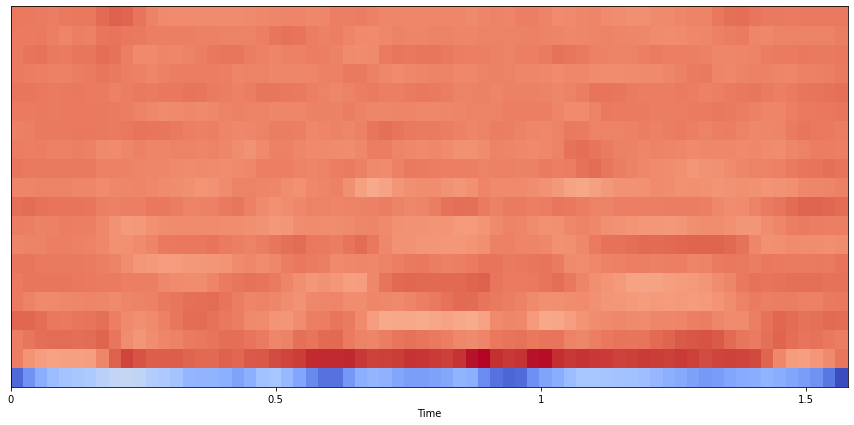

In [ ]:
mfccs = librosa.feature.mfcc(data, sr=sampling_rate)
print(mfccs.shape)
(20, 97)
#Displaying  the MFCCs:
plt.figure(figsize=(15, 7))
librosa.display.specshow(mfccs, sr=sampling_rate, x_axis='time')

Chroma features

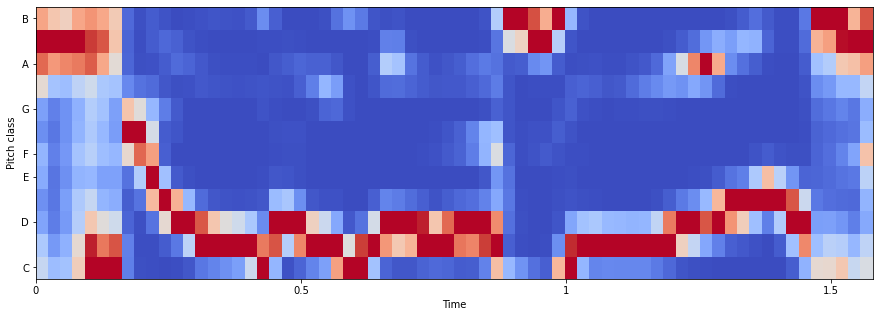

In [ ]:
chromagram = librosa.feature.chroma_stft(data, sr=sampling_rate)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', cmap='coolwarm')

Saving spectrogram

In [ ]:
data_path.head()

,song_path,sentiment
0,./AudioData/DC/sa09.wav,sadness
1,./AudioData/DC/n12.wav,neutral
2,./AudioData/DC/d09.wav,disgust
3,./AudioData/DC/n06.wav,neutral
4,./AudioData/DC/f14.wav,fear


In [ ]:
path = np.array(data_path.song_path[data_path.sentiment == 'fear'])[200]

In [ ]:
data, sampling_rate = librosa.load(path,duration=2)

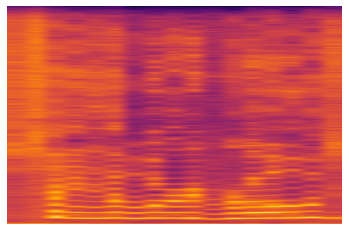

In [ ]:
cmap = plt.get_cmap('inferno')
plt.specgram(data, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB')
plt.axis('off')
plt.savefig('gdrive/MyDrive/Projects/audio_signal/sentiment_classification/sample.png',bbox_inches='tight',pad_inches=0)

In [ ]:
from tqdm import tqdm

In [ ]:
path = 'gdrive/MyDrive/Projects/audio_signal/sentiment_classification/imagedata'
for i in tqdm(range(1225,len(data_path))):
  folder_name = data_path.loc[i,'sentiment']
  file_path = data_path.loc[i,'song_path']
  data, sampling_rate = librosa.load(file_path,duration=2)
  cmap = plt.get_cmap('inferno')
  plt.specgram(data, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB')
  plt.axis('off')

  image_path = path+'/'+folder_name+'/'+'spectro-'+str(i)

  plt.savefig(image_path,bbox_inches='tight',pad_inches=0)



 28%|██▊       | 995/3495 [6:18:41<33:28:49, 48.21s/it]

Feature Extraction

In [ ]:
# header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
# for i in range(1, 21):
#     header += f' mfcc{i}'
# header += ' label'
# header = header.split(' ')

In [ ]:
feature_dataframe = pd.DataFrame()

In [ ]:
feature_dataframe.head()

""


In [ ]:
for row in data_path.iterrows():
  path=  row[-1].song_path
  label = row[-1].sentiment
  y, sr = librosa.load(path, mono=True, duration=2)
  rmse = librosa.feature.rms(y=y)
  chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
  spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
  spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
  rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
  zcr = librosa.feature.zero_crossing_rate(y)
  mfcc = librosa.feature.mfcc(y=y, sr=sr)
  featuredict = {'filename':path,'chroma_stft':np.mean(chroma_stft),'rmse':np.mean(rmse),'spectral_centroid':np.mean(spec_cent),'spectral_bandwidth':np.mean(spec_bw),'rolloff':np.mean(rolloff),'zero_crossing_rate':np.mean(zcr),'label':label}
  mfcc_dict ={}
  for i, e in enumerate(mfcc):
    mfcc_dict[f'mfcc{i+1}'] = np.mean(e)
  featuredict.update(mfcc_dict)
  feature_dataframe= feature_dataframe.append(featuredict, ignore_index=True)


In [ ]:
feature_dataframe.head()

In [ ]:
# feature_dataframe.to_csv('gdrive/MyDrive/Projects/audio_signal/sentiment_classification/features.csv')

In [ ]:
dataframe = pd.read_csv('gdrive/MyDrive/Projects/audio_signal/sentiment_classification/features.csv')

In [ ]:
dataframe.head()

,Unnamed: 0,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,label,mfcc1,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
0,0,./AudioData/DC/d09.wav,0.503414,0.103051,694.863480,990.521846,1256.103516,0.017415,disgust,-359.28177,...,-0.606399,-4.132690,-2.872957,4.688799,2.382046,-4.460833,0.715012,2.753743,-2.822712,-1.232107
1,1,./AudioData/DC/su01.wav,0.459128,0.095510,1122.876587,1345.021573,2028.947501,0.028045,surprise,-344.78262,...,-6.548965,0.965360,-2.634533,-1.934255,8.987363,-3.841317,0.398155,0.711946,-3.419717,-5.203150
2,2,./AudioData/DC/n04.wav,0.529255,0.063391,724.091726,1120.657224,1465.742861,0.010680,neutral,-427.46300,...,2.369684,1.587715,-5.176300,2.977138,13.702925,-0.908167,-5.765352,3.098535,0.205673,-2.567300
3,3,./AudioData/DC/n05.wav,0.484136,0.066786,720.617453,1080.161528,1395.079304,0.011848,neutral,-427.36288,...,-1.499043,2.707392,-2.500517,2.068165,10.556689,-3.045650,-3.442080,3.522003,-4.839116,-1.168096
4,4,./AudioData/DC/sa01.wav,0.534037,0.079203,811.187745,1164.456285,1354.859240,0.012196,sadness,-412.85168,...,-2.113290,2.135487,-0.984027,3.636961,10.473126,-6.798249,0.777758,9.563130,-2.300718,-0.797626


In [ ]:
X = dataframe.drop(columns=['filename','label','Unnamed: 0'])
# X = X.to_numpy()

In [ ]:
X.corr()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
chroma_stft,1.000000,-0.000127,0.063351,0.132776,0.205031,0.249121,-0.401859,0.060797,-0.095767,0.271437,...,0.671632,-0.321082,0.446426,-0.428699,0.147354,0.138683,-0.230052,-0.158975,0.252840,-0.005255
rmse,-0.000127,1.000000,-0.346149,-0.504870,-0.382930,-0.335511,0.667616,0.260736,-0.095481,0.310112,...,0.014333,0.114643,-0.103910,-0.014861,0.186499,-0.188217,0.090761,-0.026091,-0.138848,-0.036508
spectral_centroid,0.063351,-0.346149,1.000000,0.764451,0.961786,0.900247,-0.076919,-0.853965,-0.541142,-0.242311,...,-0.110887,0.205676,-0.212994,0.066309,-0.347139,-0.138561,-0.101356,-0.095545,-0.164568,0.293745
spectral_bandwidth,0.132776,-0.504870,0.764451,1.000000,0.857697,0.649761,-0.277387,-0.622167,-0.236429,-0.346904,...,-0.059891,0.023215,-0.012388,0.038527,-0.223889,0.107669,-0.216185,0.053720,0.076414,0.090675
rolloff,0.205031,-0.382930,0.961786,0.857697,1.000000,0.883143,-0.206030,-0.838214,-0.526386,-0.203967,...,0.018912,0.119833,-0.118437,0.004282,-0.319958,-0.077736,-0.162272,-0.119158,-0.079046,0.247343
zero_crossing_rate,0.249121,-0.335511,0.900247,0.649761,0.883143,1.000000,-0.244734,-0.748315,-0.523592,-0.167008,...,0.068576,0.042526,-0.096643,-0.093511,-0.337449,-0.150655,-0.184467,-0.174378,-0.111526,0.226625
mfcc1,-0.401859,0.667616,-0.076919,-0.277387,-0.206030,-0.244734,1.000000,0.071470,-0.166464,0.023488,...,-0.412378,0.378646,-0.301188,0.296994,0.060870,-0.143850,0.252871,0.158599,-0.242261,0.158004
mfcc2,0.060797,0.260736,-0.853965,-0.622167,-0.838214,-0.748315,0.071470,1.000000,0.618221,0.251158,...,0.095300,-0.176318,0.198568,-0.085295,0.278829,0.152085,0.102010,0.087355,0.122824,-0.232776
mfcc3,-0.095767,-0.095481,-0.541142,-0.236429,-0.526386,-0.523592,-0.166464,0.618221,1.000000,0.214856,...,-0.030860,-0.133415,0.065217,0.091381,0.158161,0.178243,0.086726,0.158562,0.091350,-0.245116
mfcc4,0.271437,0.310112,-0.242311,-0.346904,-0.203967,-0.167008,0.023488,0.251158,0.214856,1.000000,...,0.271270,0.189743,-0.035523,0.028454,0.088310,-0.253521,0.225509,-0.329735,-0.207776,0.084827


In [ ]:
Y = dataframe['label']
Y.head()

0     disgust
1    surprise
2     neutral
3     neutral
4     sadness
Name: label, dtype: object

In [ ]:
import sklearn

In [ ]:
Y = dataframe['label']
labelEncoder = sklearn.preprocessing.LabelEncoder()
Y = labelEncoder.fit_transform(Y)

In [ ]:
Y[:5]

array([2, 7, 5, 5, 6])

In [ ]:
labelEncoder.inverse_transform([7])

array(['surprise'], dtype=object)

In [ ]:
X = sklearn.preprocessing.normalize(X)
pca = sklearn.decomposition.PCA(n_components = 20)
X = pca.fit_transform(X)

In [ ]:
X.shape

(4720, 20)

In [ ]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X,Y,test_size= 0.2, random_state= 42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier()
model.fit(X_train, Y_train)

RandomForestClassifier()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
sklearn.metrics.accuracy_score(Y_test, y_pred)